# Graphique autour du COVID-19 (SARS-CoV-2)

## Importation des données

Les données que nous utiliserons dans un premier temps sont compilées par le Johns Hopkins University Center for Systems Science and Engineering (JHU CSSE) et sont mises à disposition sur GitHub par une adresse URL :

In [12]:
%matplotlib inline
#Importation des bibliothèques
from matplotlib import ticker
import pandas as pd
import matplotlib.pyplot as plt
import datetime

#URL des données relatives au nombre cumulée des personnes atteintes du COVID 19
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

data_brut = pd.read_csv(data_url)
data_brut

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN              Antarctica   
6                                             NaN     Antigua and Barbuda   
7                                             NaN               Argentina   
8                                             NaN                 Armenia   
9                    Australian Capital Territory               Australia   
10                                New South Wales               Australia   
11                             Northern Territory               Australia   
12                                     Queensland               Australia   
13                                South Australia               Australia   
14                                       Tasmania               Australia   
15                                       Victoria               Australia   
16                              Western Australia               Australia   
17                                            NaN                 Austria   
18                                            NaN              Azerbaijan   
19                                            NaN                 Bahamas   
20                                            NaN                 Bahrain   
21                                            NaN              Bangladesh   
22                                            NaN                Barbados   
23                                            NaN                 Belarus   
24                                            NaN                 Belgium   
25                                            NaN                  Belize   
26                                            NaN                   Benin   
27                                            NaN                  Bhutan   
28                                            NaN                 Bolivia   
29                                            NaN  Bosnia and Herzegovina   
..                                            ...                     ...   
259                                           NaN                  Tuvalu   
260                                           NaN                      US   
261                                           NaN                  Uganda   
262                                           NaN                 Ukraine   
263                                           NaN    United Arab Emirates   
264                                      Anguilla          United Kingdom   
265                                       Bermuda          United Kingdom   
266                        British Virgin Islands          United Kingdom   
267                                Cayman Islands          United Kingdom   
268                               Channel Islands          United Kingdom   
269                   Falkland Islands (Malvinas)          United Kingdom   
270                                     Gibraltar          United Kingdom   
271                                      Guernsey          United Kingdom   
272                                   Isle of Man          United Kingdom   
273                                        Jersey          United Kingdom   
274                                    Montserrat          United Kingdom   
275                              Pitcairn Islands          United Kingdom   
276  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
277                      Turks and Caicos Islands          United Kingdom   
278                                           NaN          United Kingdom   
279                            

## Sélection des données

Nous voulons afficher les données pour les pays suivants : la Belgique, la Chine - toutes les provinces sauf Hong-Kong, Hong Kong, la France métropolitaine, l’Allemagne, l’Iran, l’Italie, le Japon, la Corée du Sud, la Hollande sans les colonies, le Portugal, l’Espagne, le Royaume-Unis sans les colonies et les États-Unis.

Les seuls exceptions à traiter seront la Chine et Hong Kong.

Nous sélectionnons d'abord les données dont la colonne "Country/Region" correspond.

In [2]:
country_list = ["Belgium", "France", "Germany", "China", "Iran", "Italy", "Japan", "Korea, South", "Netherlands", "Portugal", "Spain", "United Kingdom", "US"]


data_brut[data_brut["Country/Region"].isin(country_list)]

Province/State  Country/Region        Lat  \
24                                            NaN         Belgium  50.833300   
59                                          Anhui           China  31.825700   
60                                        Beijing           China  40.182400   
61                                      Chongqing           China  30.057200   
62                                         Fujian           China  26.078900   
63                                          Gansu           China  35.751800   
64                                      Guangdong           China  23.341700   
65                                        Guangxi           China  23.829800   
66                                        Guizhou           China  26.815400   
67                                         Hainan           China  19.195900   
68                                          Hebei           China  39.549000   
69                                   Heilongjiang           China  47.862000   
70                                          Henan           China  37.895700   
71                                      Hong Kong           China  22.300000   
72                                          Hubei           China  30.975600   
73                                          Hunan           China  27.610400   
74                                 Inner Mongolia           China  44.093500   
75                                        Jiangsu           China  32.971100   
76                                        Jiangxi           China  27.614000   
77                                          Jilin           China  43.666100   
78                                       Liaoning           China  41.295600   
79                                          Macau           China  22.166700   
80                                        Ningxia           China  37.269200   
81                                        Qinghai           China  35.745200   
82                                        Shaanxi           China  35.191700   
83                                       Shandong           China  36.342700   
84                                       Shanghai           China  31.202000   
85                                         Shanxi           China  37.577700   
86                                        Sichuan           China  30.617100   
87                                        Tianjin           China  39.305400   
..                                            ...             ...        ...   
130                             Wallis and Futuna          France -14.293800   
131                                           NaN          France  46.227600   
135                                           NaN         Germany  51.165691   
150                                           NaN            Iran  32.427908   
154                                           NaN           Italy  41.871940   
156                                           NaN           Japan  36.204824   
162                                           NaN    Korea, South  35.907757   
196                                         Aruba     Netherlands  12.521100   
197              Bonaire, Sint Eustatius and Saba     Netherlands  12.178400   
198                                       Curacao     Netherlands  12.169600   
199                                  Sint Maarten     Netherlands  18.042500   
200                                           NaN     Netherlands  52.132600   
218                                           NaN        Portugal  39.399900   
241                                           NaN           Spain  40.463667   
260                                           NaN              US  40.000000   
264                                      Anguilla  United Kingdom  18.220600   
265                                       Bermuda  United Kingdom  32.307800   
266                        British Virgin Islands  United Kingdom  18.420700   
267                                

Pour chaque pays, nous allons convertir les données en DataFrame vers des séries, avec avec comme index les dates où sont enregistrées des données, et comme données les cas de Covid 19 cumulées. (avec la fonction `squeeze(axis=0)`)

Nous rangerons ensuite ces séries dans un dictionnaire où les clés seront les noms des pays.

Pour régler l'exception de la Chine, nous séparerons les données de Hong Kong des autres.
D'un côté, en prenant les données des provinces ne venant pas d'Hong Kong, on fait la somme des données de toutes les provinces.
De l'autre côté, nous prenons les données d'Hong Kong à part.

In [23]:
#Création du dictionnaire
dataframes = {country : data_brut[data_brut["Country/Region"] == country] for country in country_list}

#Pour chaque pays du dictionnaire sauf la Chine, remplacer la DataFrame en Series
for dtf in dataframes:
    if dtf != "China" :
        dataframes[dtf] = dataframes[dtf][dataframes[dtf]["Province/State"].isna()].squeeze(axis=0)[4:]
        #Pour le formatage de la date
        dataframes[dtf].index = pd.to_datetime(dataframes[dtf].index)

#Cas de la Chine et Hong Kong
dataframesChina = dataframes["China"][dataframes["China"]["Province/State"] != "Hong Kong"].sum(axis=0, numeric_only=True)[2:]
dataframesHK = dataframes["China"][dataframes["China"]["Province/State"] == "Hong Kong"].squeeze(axis=0)[4:]

#Ajout manuel de la Chine et de Hong Kong
dataframes["China"] = dataframesChina
dataframes["China"].index = pd.to_datetime(dataframes["China"].index)
dataframes["Hong Kong"] = dataframesHK
dataframes["Hong Kong"].index = pd.to_datetime(dataframes["Hong Kong"].index)


Enfin, nous pouvons sortir un graphe à échelle linéaire en dessinant une courbe pour chaque pays.

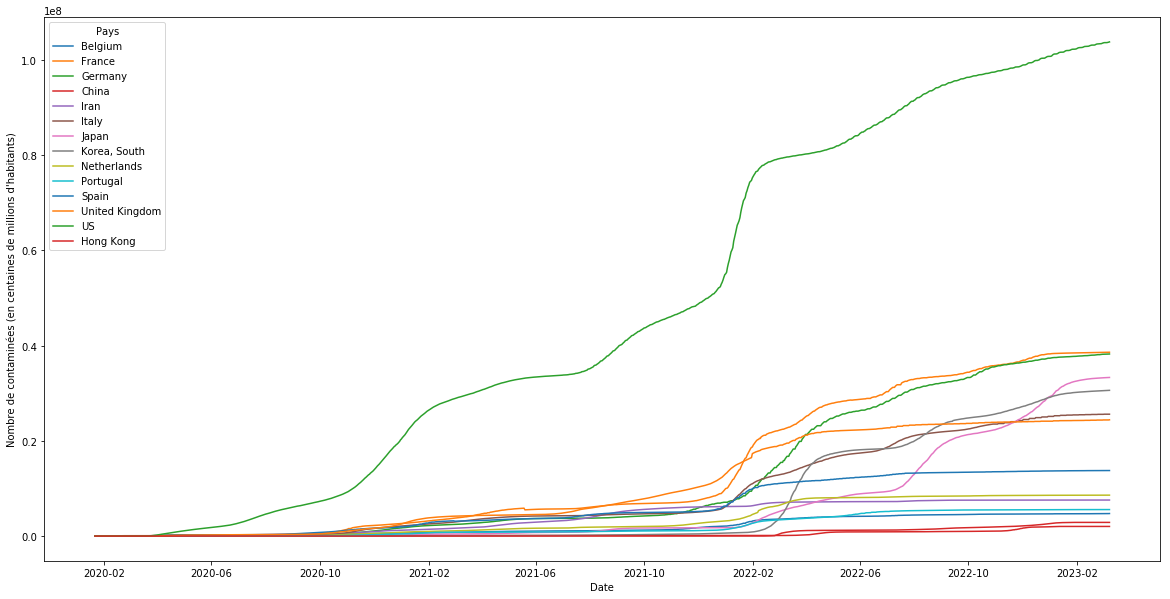

In [25]:
#Agrandissement de la taille du graphe
plt.figure(figsize=(20,10))

#Pour chaque série, dessiner la courbe
for name, dtf in dataframes.items():
    plt.plot(dtf, label=name)

#Légende et nom des axes
plt.legend(title='Pays')
plt.xlabel("Date")
plt.ylabel("Nombre de contaminées (en centaines de millions d'habitants)")

#display plot
plt.show()

Nous voyons que les données ont des variations très importantes. Pour nous permettre une meilleure vue d'ensemble, nous passons sur une échelle logarithmique.

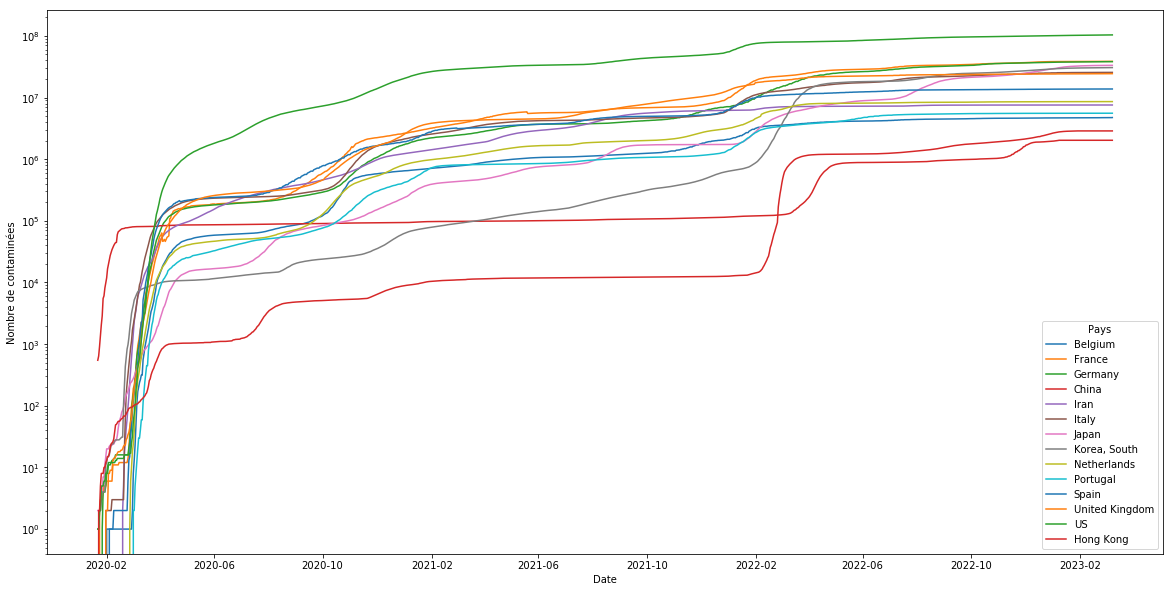

In [26]:
#Agrandissement de la taille du graphe
plt.figure(figsize=(20,10))

#Pour chaque série, dessiner la courbe
for name, dtf in dataframes.items():
    plt.plot(dtf, label=name)

#Légende
plt.legend(title='Pays')
plt.xlabel("Date")
plt.ylabel("Nombre de contaminées")

#Echelle logarithmique
plt.yscale("log")

#display plot
plt.show()

Nous pouvons remarquer le premier essor des contaminés en mars/avril 2020, ainsi que deux pentes acsendantes en fin 2020 et en février/mars 2022